<a href="https://colab.research.google.com/github/falcoonn/Hola_mundo/blob/main/lastmile_consumers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%pip install funpymodeling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#importamos papalerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [ ]:
from google.colab import files
files.upload()

In [ ]:
#leemos el archivo
data1 = pd.read_csv("lastmile_delivery_operations_mit_lift_lab_serving_customer.csv")
data1

In [7]:
#vemos su informacion
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   _child_record_id                        35 non-null     object 
 1   _record_id                              35 non-null     object 
 2   _parent_id                              35 non-null     object 
 3   _title                                  35 non-null     object 
 4   _version                                35 non-null     int64  
 5   _created_at                             35 non-null     object 
 6   _updated_at                             35 non-null     object 
 7   _created_by                             35 non-null     object 
 8   _updated_by                             35 non-null     object 
 9   _index                                  35 non-null     int64  
 10  _geometry                               35 non-null     object 


In [ ]:
#Verificamos los valores nulos
valores_nulos=data1.isnull().sum()
valores_nulos

In [10]:
#reemplazamos los valores nulos con la palabra nulo
data=data1.copy()
data["picture_cargo_being_delivered"] =data["picture_cargo_being_delivered"].fillna("nulo")
data["picture_cargo_being_delivered_captions"] =data["picture_cargo_being_delivered_captions"].fillna("nulo")
data["picture_cargo_being_delivered_urls"] =data["picture_cargo_being_delivered_urls"].fillna("nulo")

In [ ]:
#verificamos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

In [12]:
#aplicamos filtro
filtro1=data.iloc[ : , [0,1,2,3,5,6,7,8,10,13,17,18,21,22,23,25,26]] #obj
filtro2=data.iloc[ : , [4,9,14,15,16,19,20,24]]    #int
filtro3=data.iloc[ : , [11,12]]     #float

<Figure size 1080x576 with 0 Axes>

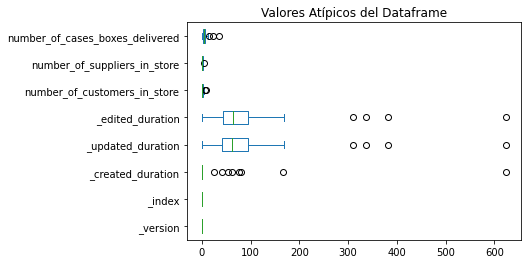

In [13]:
#hacemos una grafica de valores atipicos
fig = plt.figure(figsize =(15, 8))
filtro2.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

In [ ]:
#hacemos uso del metodo de cuartiles 
y=filtro2

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

In [ ]:
#mostramos los limites 
outliers_iqr= filtro2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
outliers_iqr

In [ ]:
#Reemplazamos valores atipicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe 
Valores_finales= outliers_iqr.copy()
Valores_finales=Valores_finales.fillna(round(outliers_iqr.mean(),1))
Valores_finales

In [ ]:
#vemos los valores nulos
valores_nulos=Valores_finales.isnull().sum()
valores_nulos

In [ ]:
#concatemos 
Consumer_limpios = pd.concat([filtro1, filtro2, filtro3], axis=1)
Consumer_limpios

In [19]:
#Convertir DataFrame a CSV
Consumer_limpios.to_csv("Consumer_limpios.csv")

In [ ]:
#Descargar archivo filtrado en csv 
from google.colab import files
files.download("Consumer_limpios.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>